# WFPT DM valid actuator selection
Notebook that demos the wfpt_dm_act_selection class.

Developed by: Fernando Quiros-Pacheco

Last update: 01/11/2024

#### Update
Using new DM numbering scheme implemented by SAO (that actually matches original ALPAO numbering).

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ceo import wfpt_visulib, wfpt_dm_act_selection, wfpt_utilities

/home/ubuntu/CEO/python/ceo/zemax


## Show actuator numbering

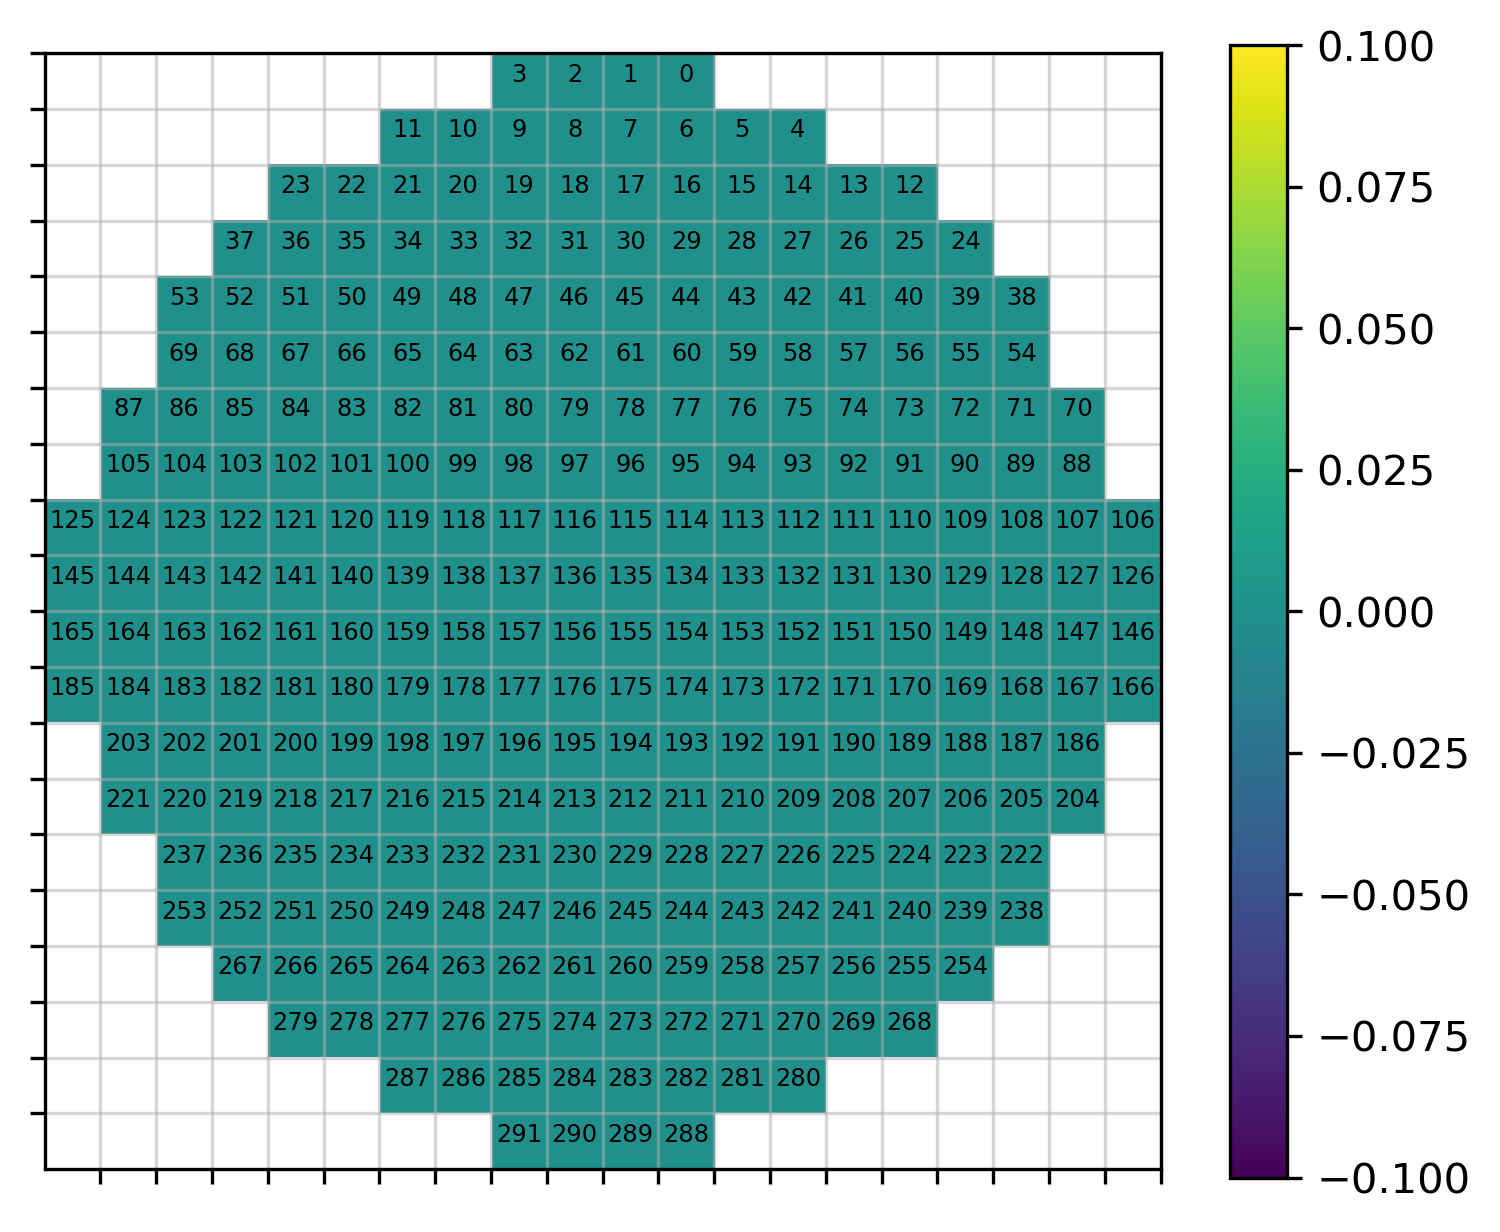

In [3]:
actmap = wfpt_visulib.dm292_actmap()
actcoord = np.argwhere(actmap)

fig, ax = plt.subplots()
fig.set_size_inches((6,5))
fig.dpi=300
wfpt_visulib.show_dm292(np.zeros(292), fig=fig, ax=ax)
for jj in range(292):
    ax.text(actcoord[jj,1], actcoord[jj,0], str(jj), fontsize='xx-small',
           horizontalalignment='center')

## Selection of actuators

### A) Valid M1 DM set for simulations (01/2024)
We updated the ordering when correcting the indexing of actuators (to match original's ALPAO numbering scheme).

#### 1. Selection based on simulated DM influence functions

In [4]:
nPx = 833
M2_baffle = 0.0
project_truss_onaxis = False
ifmat_file = wfpt_utilities.influence_matrix_filename('M1_DM', nPx, M2_baffle, project_truss_onaxis)
ifmat_file

'/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/influence_matrices/M1_DM_IFmat_nPx833_M2baffle0.0m_woTruss.npz'

In [5]:
dms = wfpt_dm_act_selection(ifmat_file, 'IFpeaks')

Restoring IF peaks from file /home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/influence_matrices/M1_DM_IFmat_nPx833_M2baffle0.0m_woTruss.npz


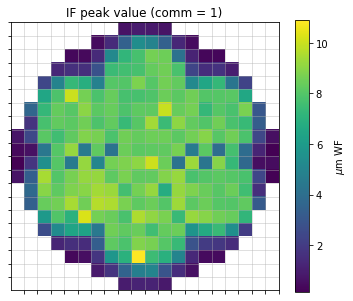

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches((6,5))
#fig.dpi=300
wfpt_visulib.show_dm292(dms.IFpeaks*1e6, fig=fig, ax=ax, title='IF peak value (comm = 1)',
                       clb_label='$\mu$m WF')

#### 2) initial selection based on thresholding

With a threshold of 0.360 you get 215 valid actuators.


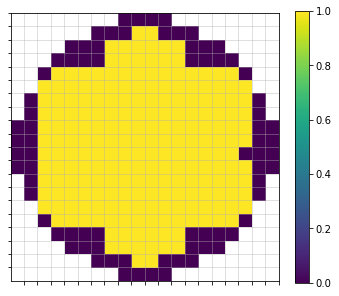

In [14]:
thr = 0.36
dms.selection_with_threshold(thr)

wfpt_visulib.show_dm292(dms.valid_acts)

####  3) Removal and addition of actuators

Number of valid actuators: 212


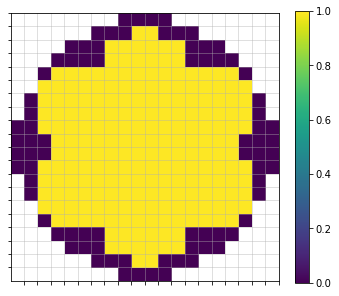

In [15]:
remove_act_list = [128, 143, 163]
add_act_list = []

dms.selection_with_actuator_index(remove_act_list, add_act_list)
wfpt_visulib.show_dm292(dms.valid_acts)

#### 4) Actuator slaving selection

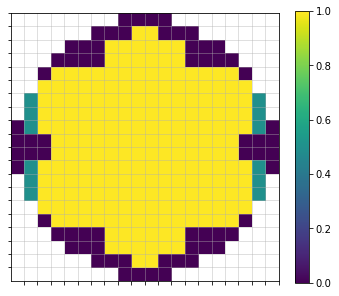

In [20]:
act_masters_right = [71, 89, 108, 168, 187, 205]
act_slaves_right  = [70, 88, 107, 167, 186, 204]
act_masters_left = [86, 104, 123, 183, 202, 220]
act_slaves_left  = [87, 105, 124, 184, 203, 221]

act_masters = act_masters_right + act_masters_left
act_slaves = act_slaves_right + act_slaves_left

dms.slaving_selection(act_masters, act_slaves)

valid_acts = dms.valid_acts.astype('float')
valid_acts[dms.act_slaves] = 0.5
wfpt_visulib.show_dm292(valid_acts)

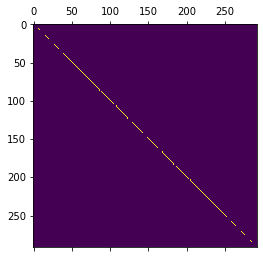

In [21]:
plt.matshow(dms.slaveMat)

### Save selection in dedicated folder

In [22]:
fname = "M1_DM_valid_actuators_simul_2024_v0.npz"
dms.save_valid_actuators_file(fname)

Saving to file /home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/dm_valid_actuators/M1_DM_valid_actuators_simul_2024_v0.npz
